# Limpieza y Análisis de URLs Legítimas - Sector Público

Este notebook contiene el análisis exploratorio y la limpieza inicial del dataset consolidado de URLs legítimas del sector público.

## Objetivos

- Evaluar la calidad y cantidad de los datos crudos.  
- Identificar valores nulos, duplicados y otras inconsistencias en las columnas principales.  
- Filtrar filas sin URLs válidas para obtener un dataset limpio y útil para modelado.  
- Documentar cada paso para facilitar la comprensión y reproducibilidad.


In [1]:
import pandas as pd  # Importa pandas para manipulación de datos
import os            # Importa os para manejar rutas

# Define la ruta base donde están los datos crudos
base_path = '/Users/test/Desktop/phishing-detector/data/raw/legitimas'

# Nombre del archivo crudo del sector público
archivo = 'publico_legitimas_crudo.csv'

# Construye la ruta completa al archivo
ruta_archivo = os.path.join(base_path, archivo)

# Carga el dataset crudo en un DataFrame
df_publico = pd.read_csv(ruta_archivo)

# Imprime la cantidad de filas cargadas para referencia
print(f"Dataset público cargado con {len(df_publico)} filas.")

# Muestra las columnas disponibles en el dataset
print(f"Columnas disponibles: {df_publico.columns.tolist()}")


Dataset público cargado con 648 filas.
Columnas disponibles: ['empresa', 'url', 'fecha', 'estado']


In [2]:
# Muestra información general del DataFrame (tipo de columnas, filas, memoria)
print("Información general del DataFrame:")
print(df_publico.info())

# Muestra el conteo de valores nulos por columna
print("\nValores nulos por columna:")
print(df_publico.isnull().sum())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   empresa  648 non-null    object
 1   url      647 non-null    object
 2   fecha    648 non-null    object
 3   estado   648 non-null    object
dtypes: object(4)
memory usage: 20.4+ KB
None

Valores nulos por columna:
empresa    0
url        1
fecha      0
estado     0
dtype: int64


In [3]:
# Filtra filas donde la columna 'url' NO sea nula
df_publico_limpio = df_publico[df_publico['url'].notna()].copy()

# Muestra cuántas filas quedan tras filtrar URLs nulas
print(f"Filas tras eliminar URLs nulas: {len(df_publico_limpio)}")


Filas tras eliminar URLs nulas: 647


In [5]:
import validators  # Librería para validar URLs

# Función para validar URLs y devolver True o False explícitamente
def es_url_valida(url):
    if pd.isna(url):
        return False  # Considerar nulos como inválidos
    resultado = validators.url(url)
    return resultado is True  # True si válida, False en caso contrario

# Aplicar la función a la columna 'url' y crear la nueva columna 'url_valida'
df_publico_limpio['url_valida'] = df_publico_limpio['url'].apply(es_url_valida)

# Calcular totales para resumen
total_urls = len(df_publico_limpio)
urls_validas = df_publico_limpio['url_valida'].sum()
urls_invalidas = total_urls - urls_validas

# Mostrar resumen de URLs válidas e inválidas
print(f"Total URLs: {total_urls}")
print(f"URLs válidas: {urls_validas} ({urls_validas / total_urls * 100:.2f}%)")
print(f"URLs inválidas: {urls_invalidas} ({urls_invalidas / total_urls * 100:.2f}%)")

# Mostrar ejemplos de URLs inválidas para revisión manual
if urls_invalidas > 0:
    print("Ejemplos de URLs inválidas:")
    print(df_publico_limpio.loc[~df_publico_limpio['url_valida'], 'url'].head(10))


Total URLs: 647
URLs válidas: 646 (99.85%)
URLs inválidas: 1 (0.15%)
Ejemplos de URLs inválidas:
113    https://revista.seg-social.es/-/espa%C3%B1a-su...
Name: url, dtype: object


Distribución por empresa:
empresa
DGT                          287
SEPE                         105
AGENCIA TRIBUTARIA (AEAT)    101
SEGURIDAD SOCIAL              74
SUMA GESTIÓN TRIBUTARIA       59
CATASTRO                      21
Name: count, dtype: int64


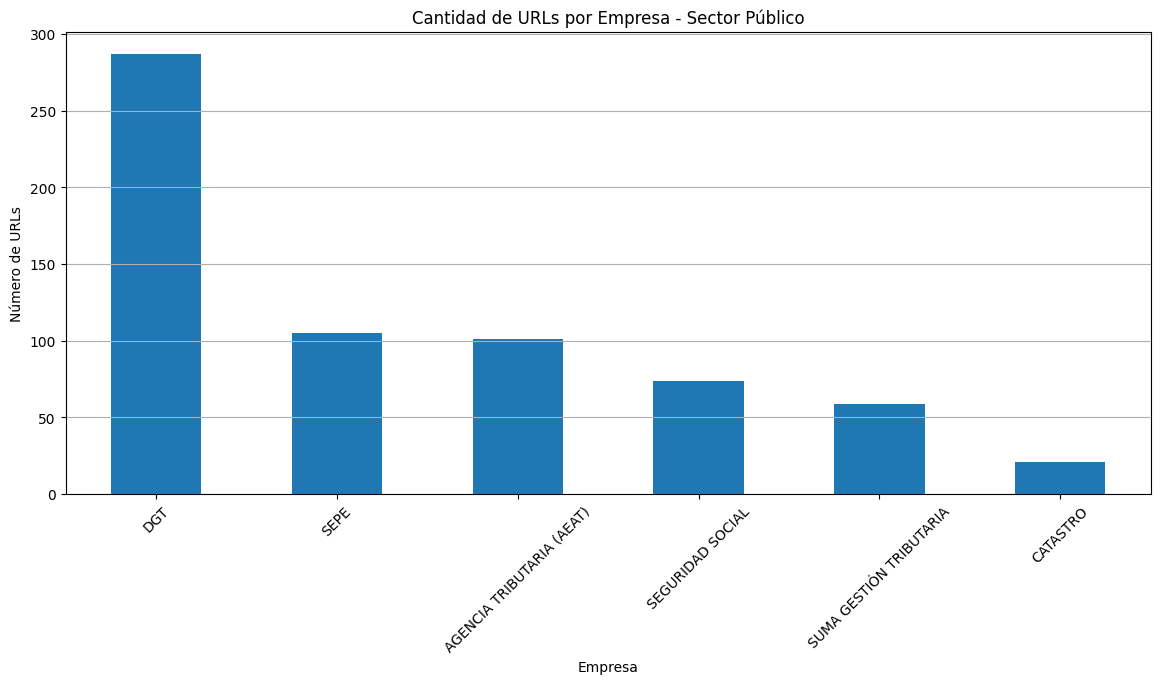

In [6]:
# Normalizamos los nombres de empresa para evitar inconsistencias
df_publico_limpio['empresa'] = df_publico_limpio['empresa'].str.upper().str.strip()

# Contamos cuántas URLs hay por cada empresa
distribucion = df_publico_limpio['empresa'].value_counts()

# Mostramos la distribución para ver qué empresas tienen más URLs
print("Distribución por empresa:")
print(distribucion)

# Importamos matplotlib para graficar
import matplotlib.pyplot as plt

# Configuramos el tamaño de la figura para la gráfica
plt.figure(figsize=(14,6))

# Creamos un gráfico de barras con la distribución
distribucion.plot(kind='bar')

# Añadimos título y etiquetas
plt.title('Cantidad de URLs por Empresa - Sector Público')
plt.xlabel('Empresa')
plt.ylabel('Número de URLs')

# Rotamos las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Añadimos una cuadrícula horizontal para facilitar la lectura
plt.grid(axis='y')

# Mostramos la gráfica
plt.show()


In [7]:
import os  # Para manejo de archivos y carpetas

# Definimos la ruta donde guardaremos los datasets procesados
base_path_processed = '/Users/test/Desktop/phishing-detector/data/processed/legitimas'

# Creamos la carpeta si no existe para evitar errores al guardar
os.makedirs(base_path_processed, exist_ok=True)

# Nombre del archivo limpio que se guardará
archivo_limpio = 'publico_legitimas_limpio.csv'

# Construimos la ruta completa para el archivo de salida
ruta_guardado = os.path.join(base_path_processed, archivo_limpio)

# Seleccionamos solo las columnas relevantes para el modelo
columnas_relevantes = ['empresa', 'url']

# Creamos un nuevo DataFrame con las columnas seleccionadas y eliminamos filas duplicadas
df_modelo = df_publico_limpio[columnas_relevantes].drop_duplicates()

# Mostramos el número de filas después de eliminar duplicados
print(f"Filas tras eliminar duplicados en columnas relevantes: {len(df_modelo)}")

# Guardamos el DataFrame limpio en un archivo CSV sin índice
df_modelo.to_csv(ruta_guardado, index=False)

# Confirmamos que el archivo se ha guardado correctamente
print(f"Dataset limpio guardado en: {ruta_guardado}")


Filas tras eliminar duplicados en columnas relevantes: 647
Dataset limpio guardado en: /Users/test/Desktop/phishing-detector/data/processed/legitimas/publico_legitimas_limpio.csv
